In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets create synthetic datapoints
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2,n_targets = 1,noise = 3)

In [3]:
X

array([[-0.04581896, -1.40666314],
       [-0.91504272,  0.12649536],
       [ 1.32518892, -1.00986736],
       ...,
       [ 0.87995498, -0.87965602],
       [ 0.74579543, -0.20267981],
       [ 0.76167587,  1.83443713]])

In [4]:
y

array([-8.37255059e+01, -4.09043128e+01,  1.08801373e+01,  1.28656394e+01,
        2.05537730e+02, -5.00618213e+01, -1.96994563e+01, -1.17771105e+02,
        5.94733711e+01, -3.84713709e+01,  1.04513726e+01, -1.05602939e+02,
        6.50401098e+01, -6.07014208e+01, -9.12683290e+00,  1.00535982e+02,
       -9.71061225e+01,  2.30924871e+01,  2.00253573e+02,  6.13944784e+01,
        1.11816076e+01,  1.72187137e+00,  2.29464925e+01,  6.59164465e+01,
        1.02762009e+02,  6.72347457e+01, -1.56997189e+01, -1.20148583e+02,
        8.17571753e+01,  1.19423858e+02,  9.14150333e+01, -6.61004108e+00,
        3.49306540e+00,  9.74736956e+01,  6.82109023e+00, -4.34895889e+00,
        2.92908384e+01,  8.99937769e+01,  6.25764634e+01,  1.53816991e+02,
        3.01461329e+01, -6.42305077e+01, -1.14306581e+02,  5.51162319e+01,
        3.76077614e+00,  1.70314915e+01,  5.22654635e+01, -1.16022322e+02,
       -8.87199101e+01, -5.24285715e+01, -2.88065878e+00,  8.97675752e+01,
        4.07775835e+01,  

In [5]:
pd.DataFrame(X)[0]

0     -0.045819
1     -0.915043
2      1.325189
3      0.815162
4      0.874614
         ...   
995   -1.208420
996    1.274630
997    0.879955
998    0.745795
999    0.761676
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

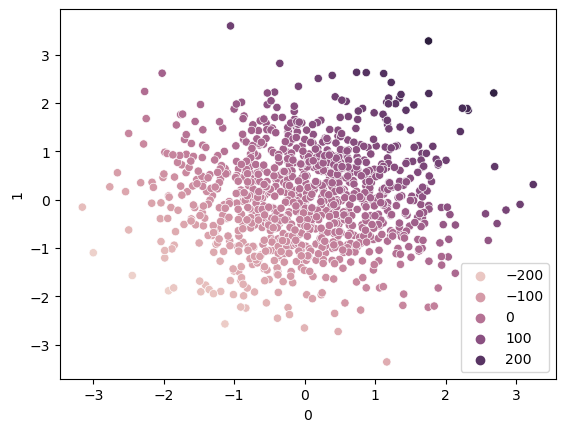

In [6]:
sns.scatterplot(x= pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue = y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =10)

In [8]:
# Support Vector Regressor
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [9]:
svr.coef_

array([[53.06779071, 59.06595143]])

In [10]:
y_pred = svr.predict(x_test)
y_pred

array([  38.11305471,  -67.41056014,  -67.34509728,   42.71489978,
         51.63693371,  -92.55187654,   22.99260186,  -18.60193313,
       -108.36600098,   71.40486601,   36.95239366,  172.52326729,
       -108.50704024,  -32.37873504,  -12.91250325, -121.52265912,
        -58.3684906 ,  -64.94843407,   95.35424654,   41.64099552,
         20.76329951,   19.8799938 , -136.76476352,  -52.89508896,
         14.72318734,  -96.75281473,   37.58617239,   69.73755433,
        187.36442813,   30.2860302 ,  197.91373858, -138.81773522,
        -61.39960987,  -77.04514358,  -57.72219346,   -4.75160277,
         30.72391165,  -74.89075989,  -12.42029271,   37.25069918,
         70.52085821,  -13.59401703, -112.28838059, -176.87566861,
         38.07652558, -112.69381816,   -9.91941186,  130.42474286,
        -38.81455558,  -91.98315871, -119.79109206,  180.77153552,
         84.24788191,    1.43677603,  107.19709529,  -16.87689778,
         86.00257673,   84.77049922,  -15.25584084,   25.06056

In [20]:
from sklearn.metrics import r2_score

In [21]:

print(r2_score(y_test,y_pred))


0.998773708561351


# Hyper parameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C':[0.1,1,100,1000],
             'gamma':[1,0.1,0.01,.001,.0001],
             'kernel':['linear'],
             'epsilon':[.1,.2,.3]}

In [28]:
grid = GridSearchCV(SVR(),param_grid = param_grid,refit = True,cv  =5,verbose = 3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.859 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.846 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.859 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C

[CV 1/5] END C=100, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.998 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.998 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 

[CV 5/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 1/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.7s
[CV 2/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.7s
[CV 3/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.8s
[CV 4/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   1.0s
[CV 5/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.8s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.7s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   0.7s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   0.8s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   1.0s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 100, 1000], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [30]:
y_pred = grid.predict(x_test)

In [31]:
y_pred

array([  38.12081042,  -67.6361798 ,  -67.63811075,   42.80360151,
         51.78189585,  -92.87206397,   23.12813573,  -18.75176159,
       -108.86052718,   71.48439658,   36.98490124,  172.94444084,
       -108.87456049,  -32.58753415,  -13.03563926, -121.96200078,
        -58.59811377,  -65.17885758,   95.52190976,   41.7030632 ,
         20.863428  ,   19.88901922, -137.08936784,  -53.12501741,
         14.66508278,  -97.09458638,   37.72107728,   69.87939324,
        187.87471227,   30.32672055,  198.47378404, -139.28619825,
        -61.61261666,  -77.4020865 ,  -57.944556  ,   -4.87235289,
         30.78190407,  -75.25734417,  -12.49504582,   37.35469202,
         70.71504662,  -13.71062514, -112.64822961, -177.57794714,
         38.21908975, -113.10773003,  -10.09884462,  130.8202238 ,
        -39.06412123,  -92.28511038, -120.28405793,  181.26306944,
         84.45541108,    1.39425023,  107.50107228,  -17.06957298,
         86.18424995,   85.03790376,  -15.28383961,   25.06439

In [32]:
from sklearn.metrics import r2_score

In [34]:
print(r2_score(y_test,y_pred))

0.9987654062957441
